In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
data=pd.read_csv('agricultural_yield.csv')

In [6]:
data.head()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374


In [7]:
data.describe()

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,74.924952,0.70375,173.447166,99.841525,502.246625,4.977500,709.167849
std,14.496298,0.45666,72.298671,9.888547,99.222767,2.259816,199.497621
min,50.003622,0.00000,50.062655,66.724469,102.007518,0.000000,108.252421
25%,62.380142,0.00000,108.734463,93.101146,435.810131,3.000000,576.382146
50%,74.630855,1.00000,175.596395,99.762840,502.877959,5.000000,722.532738
75%,87.792071,1.00000,235.200606,106.447769,568.249383,6.000000,847.814106
max,99.998898,1.00000,299.992054,138.520202,876.694217,15.000000,1406.110705


In [9]:
X=data[['Soil_Quality',	'Seed_Variety',	'Fertilizer_Amount_kg_per_hectare',	'Sunny_Days',	'Rainfall_mm',	'Irrigation_Schedule']]
y=data['Yield_kg_per_hectare'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [14]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 223802.8125 - mae: 404.3239 - val_loss: 54178.3359 - val_mae: 185.3952
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52512.5781 - mae: 184.9444 - val_loss: 49342.3945 - val_mae: 177.8548
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45387.6484 - mae: 172.2801 - val_loss: 43333.0664 - val_mae: 164.5863
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42417.9648 - mae: 166.4698 - val_loss: 41426.3125 - val_mae: 162.6313
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39947.1172 - mae: 162.1623 - val_loss: 36555.3477 - val_mae: 151.2803
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36093.5352 - mae: 153.2947 - val_loss: 33559.6250 - val_mae: 145.2398
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34040.1055 - mae: 150.9387 - val_loss: 31208.0254 - val_mae: 140.2020
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31963.0742 - mae: 145.7441 - val_loss: 29853.

In [15]:
test_loss,test_mae=model.evaluate(X_test,y_test,verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae: .2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2769.5693 - mae: 42.4367
Test Loss: 2566.331298828125, Test MAE:  40.40


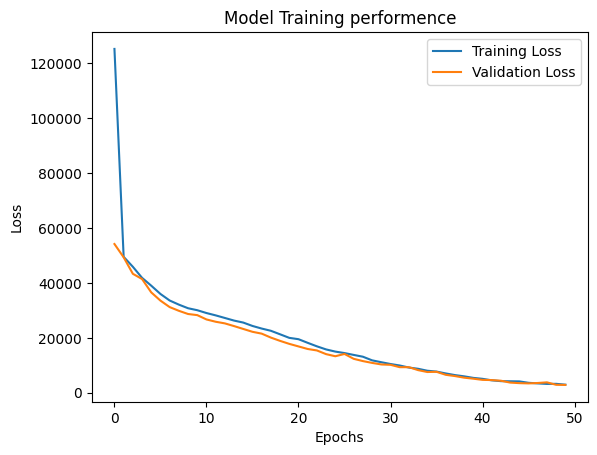

In [16]:
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training performence")
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test) # Predict on the test data

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<ipython-input-24-c3b0645f4049>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-24-c3b0645f4049>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


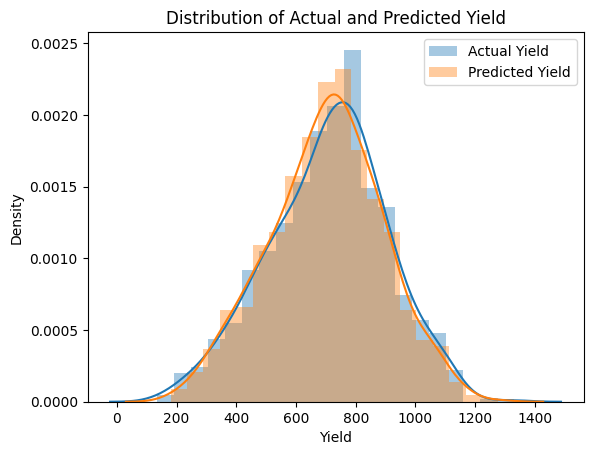

In [24]:
# Distribution plots
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

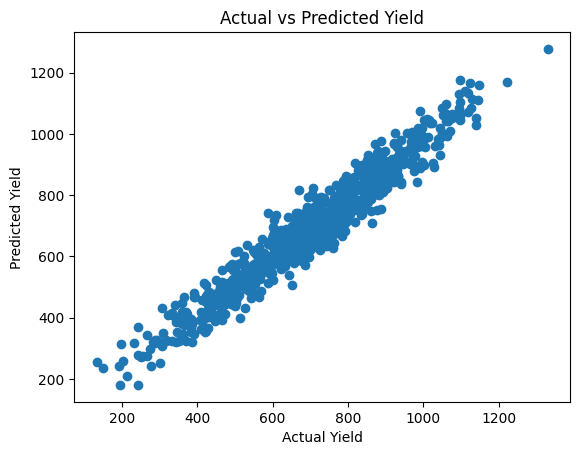

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()